# 第三次个人作业（机器学习 + 社会网络分析，满分15分）

### 第一部分：机器学习（本部分满分10分）

1.1（共6分）请针对Cylinder Bands数据集（bands.data文件）以最后一个字段（band type）为标签，利用第5个至第39个字段为特征建立分类模型。  
数据集介绍请参考[链接](https://archive.ics.uci.edu/ml/datasets/Cylinder+Bands)。注意，模型准确率不影响本作业的得分。

作业具体要求如下：

1.1.1 数据预处理（2分）  
(1) 选择合适的预处理处理方式对标称变量编码（1分）；   
(2) 找到缺失值，并选择合适方式对缺失值填充（1分）。  


In [114]:
import pandas as pd
import numpy as np
from sklearn import preprocessing,datasets,linear_model,tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,accuracy_score, f1_score, precision_score, roc_auc_score,recall_score
import matplotlib.pyplot as plt 

plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False


1.1.2 建立模型（2分）：选择3个不同的模型进行建模，并统计训练准确率。

In [115]:
df = pd.read_csv("bands.data",header=None,names=["timestamp","cylinder_number","customer","job_number","grain_screened",\
                                                "ink_color","proof_on_ctd_ink","blade_mfg","cylinder_division","paper_type",\
                                                "ink_type","direct_steam","solvent_type","type_on_cylinder","press_type",\
                                                "press","unit_number","cylinder_size","paper_mill_location","plating_tank",\
                                                "proof_cut","viscosity","caliper","ink_temperature","humifity","roughness",\
                                                "blade_pressure","varnish_pct","press_speed","ink_pct","solvent_pct","ESA_Voltage",\
                                                "ESA_Amperage","wax","hardener","roller_durometer","current_density","anode_space_ratio",\
                                                "chrome_content","band_type"])

df

,timestamp,cylinder_number,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,...,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,band_type
0,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0,0,2.5,1,34,40,105,100,band
1,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,19941005,aa66,kmart,85813,?,key,?,?,gallatin,super,...,?,?,?,1,1,?,40,112.5,100,band
537,19941009,j44,best,38064,?,key,?,?,gallatin,super,...,?,?,?,0,0,?,40,110,100,band
538,19941009,aa58,kmart,85814,?,key,?,?,gallatin,super,...,?,?,?,2.7,2.8,?,40,108,100,band
539,19941010,aa70,kmart,85814,?,key,?,?,gallatin,super,...,?,?,?,1.5,2.3,?,40,108,100,band


In [116]:
#空缺值处理，空缺值以问号的形式出现
(df=="?").sum()
df1 = df.replace('?',np.nan)
df1.isnull().sum()
df2 = df1.dropna(thresh=35)
df2.isnull().sum() #查看删除后各列的缺失情况




timestamp                0
cylinder_number          0
customer                 0
job_number               0
grain_screened           7
ink_color                0
proof_on_ctd_ink         2
blade_mfg                5
cylinder_division        0
paper_type               0
ink_type                 0
direct_steam             0
solvent_type             0
type_on_cylinder         8
press_type               0
press                    0
unit_number              0
cylinder_size            0
paper_mill_location    101
plating_tank            13
proof_cut               13
viscosity                1
caliper                 16
ink_temperature          2
humifity                 1
roughness               26
blade_pressure          62
varnish_pct              1
press_speed             10
ink_pct                  1
solvent_pct              1
ESA_Voltage              2
ESA_Amperage             0
wax                      4
hardener                 3
roller_durometer         0
current_density          3
a

In [117]:
print(df2["grain_screened"].unique())
print(df2["proof_on_ctd_ink"].unique())
print(df2["blade_mfg"].unique())
print(df2["type_on_cylinder"].unique())
print(df2["paper_mill_location"].unique())
print(df2["plating_tank"].unique())
print(df2["proof_cut"].unique())
print(df2["viscosity"].unique())
print(df2["caliper"].unique())
print(df2["ink_temperature"].unique())
print(df2["humifity"].unique())
print(df2["roughness"].unique())
print(df2["blade_pressure"].unique())
print(df2["varnish_pct"].unique())
print(df2["press_speed"].unique())
print(df2["ink_pct"].unique())
print(df2["solvent_pct"].unique())
print(df2["ESA_Voltage"].unique())
print(df2["wax"].unique())
print(df2["hardener"].unique())
print(df2["current_density"].unique())
print(df2["anode_space_ratio"].unique())
#查看数据是定性或定类
#前6个是定类数据，其余是定量数据

['YES' 'NO' nan]
['YES' 'NO' nan]
['BENTON' nan 'UDDEHOLM']
['YES' 'NO' nan]
['NorthUS' nan 'CANADIAN' 'CANAdiAN' 'SCANDANAVIAN' 'SouthUS'
 'mideuropean']
['1911' nan '1910']
['55' '62' '52' '50' '65' '40' nan '30' '60' '45' '35' '37.5' '32.5'
 '52.5' '25' '47.5' '42.5' '67.5' '49' '42' '47' '57.5' '72.5' '55.5'
 '62.5' '70' '32' '27.5']
['46' '40' '45' '43' '50' '38' '41' '42' '44' '47' '35' '39' '48' '37'
 '49' '68' '60' '55' '52' '56' '57' '67' '63' '53' '59' '54' '64' '70'
 '62' '69' '66' '65' '58' '51' '61' '72' nan]
['0.2' '0.3' '0.433' '0.267' '0.367' '0.333' '0.233' nan '0.4' '0.35'
 '0.283' '0.5' '0.467' '0.167' '0.533' '0.133' '0.217' '0.25']
['17' '15' '16' '16.8' '16.5' '12' '14' '14.5' '15.5' '16.4' '16.3' '15.8'
 '15.2' '14.1' '15.4' '16.6' '13' '15.9' '18' '14.6' '24.5' '14.43' '14.2'
 '18.5' '16.2' '14.02' '15.3' '15.1' '16.1' '14.7' '14.9' '12.5' '15.6'
 '13.9' '13.34' '13.86' '13.6' '15.7' '13.4' '16.02' '15.03' '15.59'
 '14.3' '13.23' '14.42' '16.08' '13.5' '13.8' '1

In [118]:
#发现paper mill location中canadian存在大小写错误
df2["paper_mill_location"].replace(to_replace='CANAdiAN',value='CANADIAN',inplace=True)

C:\Users\60175\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [119]:
#发现press_speed中存在数据0，有些不合理，深究
display((df2=="0").sum())
print(df2["varnish_pct"].unique())
print(df2["press_speed"].unique())
print(df2["ESA_Voltage"].unique())
print(df2["ESA_Amperage"].unique())
print(df2["wax"].unique())
print(df2["hardener"].unique())
#发现存在0的数据中只有press_speed的一个数据是不合理的，将他视为缺失值
df2["press_speed"].replace("0",np.nan,inplace=True)
display((df2=="0").sum())

timestamp                0
cylinder_number          0
customer                 0
job_number               0
grain_screened           0
ink_color                0
proof_on_ctd_ink         0
blade_mfg                0
cylinder_division        0
paper_type               0
ink_type                 0
direct_steam             0
solvent_type             0
type_on_cylinder         0
press_type               0
press                    0
unit_number              0
cylinder_size            0
paper_mill_location      0
plating_tank             0
proof_cut                0
viscosity                0
caliper                  0
ink_temperature          0
humifity                 0
roughness                0
blade_pressure           0
varnish_pct            211
press_speed              1
ink_pct                  0
solvent_pct              0
ESA_Voltage            316
ESA_Amperage           476
wax                      6
hardener                 6
roller_durometer         0
current_density          0
a

['13.1' '6.6' '6.5' '5.6' '0' '8.6' '22.7' '15.5' '10.5' '10' '15.8' '5.9'
 '11' '6.7' '1.2' '8' '20' '21.7' '7.6' '8.5' '7' '7.9' '2.4' '14.1' '4.7'
 '8.8' '7.2' '9.4' '11.8' '2.3' '7.4' '16.3' '12.4' '9.1' '9.6' '13.3'
 '11.1' '15' '16.7' '3.4' '8.9' '16.1' '6.25' '1.5' '4.8' '10.2' '20.6'
 '17.1' '4.3' '5.7' '5.4' '10.6' '20.4' '6' '5.3' '0.5' '4.4' '20.7'
 '18.9' '1.1' '9.5' '17.7' '11.7' '10.9' '4.5' '2.2' '3.3' '15.9' '24.8'
 '19.1' '11.3' '13' '13.7' '35.8' '7.0' '14.3' '18.0' '20.3' '21.8' '7.5'
 '22.1' '20.2' '3.5' '19.5' '25.6' '19' '5.5' '12.3' '6.4' '18' '8.3'
 '17.3' '10.8' '9.8' '13.4' '9.9' '15.6' '10.3' '10.4' '9.7' '3.6' '7.7'
 '34.5' '15.2' '17.5' '22.0' '16.5' '12' '1' '18.5' '3.1' '5.1' '14.4'
 '14.6' '11.2' '21' '11.5' nan '18.1' '2.5' '9.0' '3.2' '6.9' '12.5' '8.2']
['1700' '1900' '1850' '1467' '2100' '2600' '1650' '1750' '1600' '1500'
 '1400' '2400' '2200' '2000' '2150' '2050' '1510' '1425' '2270' '1480'
 '2300' '1100' '1300' '1800' '1683' '1734' nan '2380' '1550

timestamp                0
cylinder_number          0
customer                 0
job_number               0
grain_screened           0
ink_color                0
proof_on_ctd_ink         0
blade_mfg                0
cylinder_division        0
paper_type               0
ink_type                 0
direct_steam             0
solvent_type             0
type_on_cylinder         0
press_type               0
press                    0
unit_number              0
cylinder_size            0
paper_mill_location      0
plating_tank             0
proof_cut                0
viscosity                0
caliper                  0
ink_temperature          0
humifity                 0
roughness                0
blade_pressure           0
varnish_pct            211
press_speed              0
ink_pct                  0
solvent_pct              0
ESA_Voltage            316
ESA_Amperage           476
wax                      6
hardener                 6
roller_durometer         0
current_density          0
a

In [120]:
#用众数填补定类数据，用中位数填补定量数据
nalist = ["grain_screened","proof_on_ctd_ink","blade_mfg","type_on_cylinder","plating_tank","proof_cut","viscosity",\
          "caliper","ink_temperature","humifity","roughness","varnish_pct","press_speed","ink_pct",\
          "solvent_pct","ESA_Voltage","wax","hardener","current_density","anode_space_ratio"]
for x in range(len(nalist)):
    if x <= 4:
        df2[nalist[x]] = df2[nalist[x]].replace(np.nan,df2[nalist[x]].mode()[0])
    else:
        df2[nalist[x]] = df2[nalist[x]].replace(np.nan,df2[nalist[x]].median())

#paper mill location 和 blade pressure的缺失值较为严重，不采用众数和中位数填补的方式，采用上位数据填补的方式
df2["paper_mill_location"].fillna(method="pad",inplace=True) 
df2["blade_pressure"].fillna(method="pad",inplace=True)
df2.isnull().sum() 
#空缺值全部处理完毕，主要将单行超过5个缺失的数据删除，然后用众数填补定类数据，中位数填补定量数据

<ipython-input-120-510ab2e7ead5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[nalist[x]] = df2[nalist[x]].replace(np.nan,df2[nalist[x]].mode()[0])
<ipython-input-120-510ab2e7ead5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[nalist[x]] = df2[nalist[x]].replace(np.nan,df2[nalist[x]].median())
<ipython-input-120-510ab2e7ead5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

timestamp              0
cylinder_number        0
customer               0
job_number             0
grain_screened         0
ink_color              0
proof_on_ctd_ink       0
blade_mfg              0
cylinder_division      0
paper_type             0
ink_type               0
direct_steam           0
solvent_type           0
type_on_cylinder       0
press_type             0
press                  0
unit_number            0
cylinder_size          0
paper_mill_location    0
plating_tank           0
proof_cut              0
viscosity              0
caliper                0
ink_temperature        0
humifity               0
roughness              0
blade_pressure         0
varnish_pct            0
press_speed            0
ink_pct                0
solvent_pct            0
ESA_Voltage            0
ESA_Amperage           0
wax                    0
hardener               0
roller_durometer       0
current_density        0
anode_space_ratio      0
chrome_content         0
band_type              0


In [121]:
#定量数据标准化
data_quantity=df2[["proof_cut","viscosity","caliper","ink_temperature","humifity","roughness",\
                     "blade_pressure","varnish_pct","press_speed","ink_pct","solvent_pct","ESA_Voltage",\
                     "ESA_Amperage","wax","hardener","roller_durometer","current_density","anode_space_ratio",\
                     "chrome_content"]]
scaler=preprocessing.StandardScaler().fit(data_quantity)
quan_scaled=scaler.transform(data_quantity)

In [122]:
df2.groupby("ink_color").count()

,timestamp,cylinder_number,customer,job_number,grain_screened,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,ink_type,...,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,band_type
ink_color,,,,,,,,,,,,,,,,,,,,,
KEY,478,478,478,478,478,478,478,478,478,478,...,478,478,478,478,478,478,478,478,478,478
KeY,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [123]:
#用OneHotEncoder做定性数据标称特征编码
df2['unit_number'] = df['unit_number'].astype(str)#将unit_number从float转至object
list1 = ["grain_screened","ink_color","proof_on_ctd_ink","blade_mfg","cylinder_division","paper_type",\
       "ink_type","direct_steam","solvent_type","type_on_cylinder","press_type",\
       "press","unit_number","cylinder_size","paper_mill_location","plating_tank","band_type"]

option = []
for x in range(len(list1)):
    option.append(df2[list1[x]].unique().tolist())
display(option)

grain_screened = option[0]
ink_color = option[1]
proof_on_ctd_ink = option[2]
blade_mfg = option[3]
cylinder_division = option[4]
paper_type = option[5]
ink_type = option[6]
direct_steam = option[7]
solvent_type = option[8]
type_on_cylinder = option[9]
press_type = option[10]
press = option[11]
unit_number = option[12]
cylinder_size = option[13]
paper_mill_location = option[14]
plating_tank = option[15]
band_type = option[16]

#_workclass_dic = dataset_2['workclass'].unique().tolist()
#_education_dic = dataset_2['education'].unique().tolist()
#_MA_dic = dataset_2['marital-status'].unique().tolist()
#_occupation_dic = dataset_2['occupation'].unique().tolist()
#_relationship_dic = dataset_2['relationship'].unique().tolist()
#_race_dic = dataset_2['race'].unique().tolist()
#_sex_dic = dataset_2['sex'].unique().tolist()
#_country_dic = dataset_2['native_country'].unique().tolist()
#_income_dic = dataset_2['Income'].unique().tolist()


<ipython-input-123-3637c2597e47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['unit_number'] = df['unit_number'].astype(str)#将unit_number从float转至object


[['YES', 'NO'],
 ['KEY', 'KeY'],
 ['YES', 'NO'],
 ['BENTON', 'UDDEHOLM'],
 ['GALLATIN'],
 ['UNCOATED', 'COATED'],
 ['UNCOATED', 'COATED', 'COVER'],
 ['NO', 'YES'],
 ['LINE', 'XYLOL', 'NAPTHA'],
 ['YES', 'NO'],
 ['Motter94', 'WoodHoe70', 'Albert70', 'Motter70'],
 ['821', '815', '816', '827', '802', '813', '824', '828'],
 ['2.0', '9.0', '7.0', '5.0', '1.0', '10.0', '6.0'],
 ['TABLOID', 'CATALOG', 'SPIEGEL'],
 ['NorthUS', 'CANADIAN', 'SCANDANAVIAN', 'SouthUS', 'mideuropean'],
 ['1911', '1910'],
 ['band', 'noband']]

In [124]:
enc=preprocessing.OneHotEncoder(categories=[grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,\
                                            cylinder_division,paper_type,ink_type,direct_steam,solvent_type,\
                                            type_on_cylinder,press_type,press,unit_number,cylinder_size,\
                                            paper_mill_location,plating_tank,band_type])
data_qualitative = df2[["grain_screened","ink_color","proof_on_ctd_ink","blade_mfg",\
                        "cylinder_division","paper_type","ink_type","direct_steam","solvent_type",\
                        "type_on_cylinder","press_type","press","unit_number","cylinder_size",\
                        "paper_mill_location","plating_tank","band_type"]]
enc.fit(data_qualitative)
quali_encoding = enc.transform(data_qualitative).toarray()
data_qualitative.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 0 to 484
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   grain_screened       481 non-null    object
 1   ink_color            481 non-null    object
 2   proof_on_ctd_ink     481 non-null    object
 3   blade_mfg            481 non-null    object
 4   cylinder_division    481 non-null    object
 5   paper_type           481 non-null    object
 6   ink_type             481 non-null    object
 7   direct_steam         481 non-null    object
 8   solvent_type         481 non-null    object
 9   type_on_cylinder     481 non-null    object
 10  press_type           481 non-null    object
 11  press                481 non-null    object
 12  unit_number          481 non-null    object
 13  cylinder_size        481 non-null    object
 14  paper_mill_location  481 non-null    object
 15  plating_tank         481 non-null    object
 16  band_typ

In [125]:
#把标准化后的数据合并
df3 = pd.merge(pd.DataFrame(quan_scaled),pd.DataFrame(quali_encoding),left_index = True, right_index = True)
df3

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,42,43,44,45,46,47,48,49,50,51
0,1.109111,-0.604855,-1.081615,1.331176,-0.062476,0.100777,-1.126274,1.073941,-0.418244,-0.924075,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.109111,-0.604855,0.345271,-0.243948,0.188997,0.100777,-1.126274,0.122192,0.206301,-0.132385,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.890770,-1.348936,2.243030,0.543614,0.188997,0.100777,-0.107587,0.107549,0.050165,-0.330307,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.774114,-1.348936,0.345271,0.543614,-0.439687,-2.238880,-0.107587,-0.024231,-1.145839,-0.006434,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.550783,-0.604855,0.345271,1.331176,0.188997,0.100777,-0.107587,-0.844200,0.830846,0.335432,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,-0.007545,1.503372,-0.125602,-0.243948,0.188997,0.100777,1.929787,-0.844200,-1.136470,0.569341,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
477,-0.845037,1.751399,-1.081615,0.543614,0.188997,-0.567696,1.929787,0.122192,-0.605607,-0.132385,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
478,-0.565873,-1.472949,-1.081615,-0.243948,0.566208,-0.567696,-0.107587,-0.844200,0.518574,0.443390,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
479,-0.565873,-1.472949,-1.081615,-0.243948,-0.816898,-1.904643,-0.107587,-0.844200,0.518574,0.443390,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


1.1.2 建立模型（2分）：选择3个不同的模型进行建模，并统计训练准确率。

In [126]:
#划分训练集和测试集
from sklearn.model_selection import train_test_split
X = df3.iloc[:,:-2] #输入数据
y = df3.iloc[:,-1] #输出数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #随机生成4：1的训练和测试数据    


In [127]:
#最小二乘
leastSquares = linear_model.LinearRegression()
leastSquares.fit(X_train, y_train.astype("int32"))
y_predLS = leastSquares.predict(X_test)
leastSquaresAcu = accuracy_score(y_test.astype('int32'), y_predLS.astype('int32'))
print("Accuracy: %.2f"%leastSquaresAcu)


Accuracy: 0.42


In [128]:
#逻辑回归
logisticReg = LogisticRegression(penalty = 'l2', tol = 0.01, solver = 'saga')
logisticReg.fit(X_train, y_train.astype('int32'))
y_predLR = logisticReg.predict(X_test)
logisticRegAcu = accuracy_score(y_test.astype('int32'), y_predLR.astype('int32'))
print("Accuracy: %.2f"%logisticRegAcu)


Accuracy: 0.73


In [129]:
#决策树
decisionTree = tree.DecisionTreeClassifier()
decisionTree.fit(X_train, y_train.astype('int'))
y_predDT = decisionTree.predict(X_test)
decisionTreeAcu = accuracy_score(y_test.astype('int32'), y_predDT.astype('int32'))
print("Accuracy: %.2f"%decisionTreeAcu)


Accuracy: 0.67


Text(0.5, 1.0, '各类模型的训练准确率')

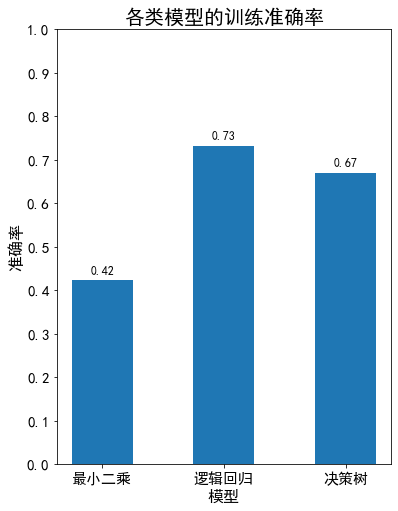

In [130]:

y = [leastSquaresAcu,logisticRegAcu,decisionTreeAcu]
x = ["最小二乘","逻辑回归","决策树"]
fig=plt.figure(figsize=(6,8))
for a,b in zip(x,y):
    plt.text(a, b+0.01, '%.2f' % b, ha='center', va= 'bottom',fontsize=12)
plt.bar(x,y,width=0.5)
plt.yticks(np.linspace(0,1,11),fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel("模型",fontsize=16)
plt.ylabel("准确率",fontsize=16)
plt.title("各类模型的训练准确率",fontsize=20)

In [131]:
#逻辑回归模型的准确率较好

1.1.3 模型比较（2分）  
(1) 比较不同模型的混淆矩阵（0.5分）；  
(2) 比较不同模型的ROC曲线（1分） ；   
(3) 比较不同模型的AUC值（0.5分） 。

In [132]:
# 混淆矩阵
from sklearn import metrics
cnf_matrixLS = metrics.confusion_matrix(y_test.astype('int32'), y_predLS.astype('int32'))
cnf_matrixLR = metrics.confusion_matrix(y_test.astype('int32'), y_predLR.astype('int32'))
cnf_matrixDT = metrics.confusion_matrix(y_test.astype('int32'), y_predDT.astype('int32'))
print(cnf_matrixLS)
print(cnf_matrixLR)
print(cnf_matrixDT)
#最小二乘为什么式3*3
display(y_predLS)
display(y_predLR)
display(y_predDT)

[[34  0]
 [56  7]]
[[20 14]
 [12 51]]
[[20 14]
 [18 45]]


array([ 0.4711675 ,  0.58646027,  0.4693622 ,  0.60209178,  0.55054932,
        0.36688243,  0.57706086,  0.66774621,  0.20563317,  0.99553928,
        0.7071955 ,  0.98328415,  0.65364418,  0.68474768,  1.15530165,
        0.54708868,  0.97728225,  0.75033959,  0.53492643,  0.58030782,
        0.59887456,  0.83579634,  0.22200674,  0.79530813,  0.42518684,
        0.61710758,  0.44058561,  0.89044811,  0.97621731,  0.71060615,
        0.41186958,  1.0651623 ,  0.64362102,  0.9511785 ,  0.64684453,
        0.85681777,  0.42712257,  0.78424962,  0.24215484,  0.92868231,
        0.66570742,  0.7489793 ,  0.95615327,  0.59214299,  0.92371077,
        1.05699363,  0.52438435,  0.5861682 ,  0.38199179,  0.31211133,
        0.3533157 ,  1.05756001,  0.31417486,  0.45132337,  0.29175043,
        1.10093043,  0.99382577,  0.38156538, -0.0959143 ,  0.81303757,
        0.99281085,  0.70621524,  0.75699509,  0.01483875,  0.45844205,
        0.50911485,  0.96166413,  0.01639432,  0.80301844,  0.82

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0])

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1])

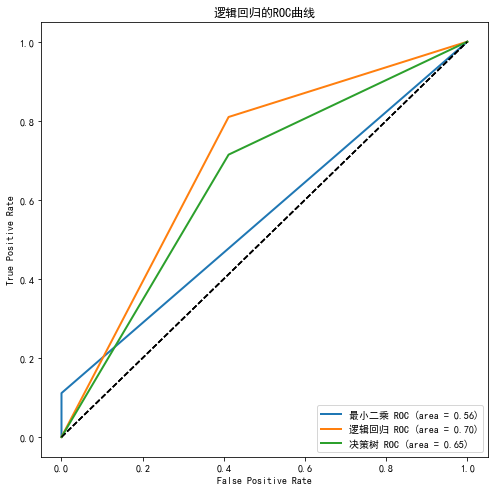

In [133]:
plt.figure(figsize=(8,8))
from sklearn.metrics import roc_curve, auc

fpr0, tpr0, thersholds0 = roc_curve(y_test.astype('int32'), y_predLS.astype('int32'))
roc_auc0 = auc(fpr0, tpr0)
plt.plot(fpr0, tpr0, label='最小二乘 ROC (area = {0:.2f})'.format(roc_auc0), lw=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('最小二乘的ROC曲线')
plt.legend(loc="lower right")
#最小二乘

fpr0, tpr0, thersholds0 = roc_curve(y_test.astype('int32'), y_predLR.astype('int32'))
roc_auc0 = auc(fpr0, tpr0)
plt.plot(fpr0, tpr0, label='逻辑回归 ROC (area = {0:.2f})'.format(roc_auc0), lw=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('逻辑回归的ROC曲线')
plt.legend(loc="lower right")
#逻辑回归

fpr0, tpr0, thersholds0 = roc_curve(y_test.astype('int32'), y_predDT.astype('int32'))
roc_auc0 = auc(fpr0, tpr0)
plt.plot(fpr0, tpr0, label='决策树 ROC (area = {0:.2f})'.format(roc_auc0), lw=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('逻辑回归的ROC曲线')
plt.legend(loc="lower right")
#决策树

In [134]:
#可以看到决策树在ROC曲线上的表现是优于其他两个的，他具有TPR高和较低的FP，模型表现较好

Text(0.5, 1.0, '各类模型的AUC值')

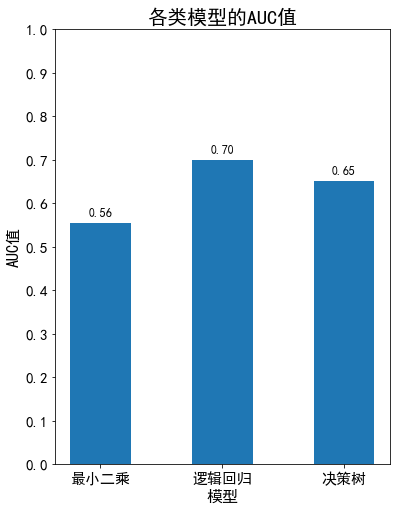

In [135]:
aucLS = roc_auc_score(y_test.astype('int32'), y_predLS.astype('int32'), average = 'micro')
aucLR = roc_auc_score(y_test.astype('int32'), y_predLR.astype('int32'), average = 'micro')
aucDT = roc_auc_score(y_test.astype('int32'), y_predDT.astype('int32'), average = 'micro')

y1 = [aucLS,aucLR,aucDT]
x1 = ["最小二乘","逻辑回归","决策树"]
fig=plt.figure(figsize=(6,8))
for a,b in zip(x1,y1):
    plt.text(a, b+0.01, '%.2f' % b, ha='center', va= 'bottom',fontsize=12)
plt.bar(x1,y1,width=0.5)
plt.yticks(np.linspace(0,1,11),fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel("模型",fontsize=16)
plt.ylabel("AUC值",fontsize=16)
plt.title("各类模型的AUC值",fontsize=20)

1.2.（共4分）请利用"BASKET.txt"数据集进行分析。  
作业具体要求如下：

1.2.1 探索性数据分析（2分）  
(1) 分析数据集中除cardid以外各个字段分布情况，并绘图展示（1分）；  
(2) 分析支付方式（pmethod）与金额（value）、性别（sex）、是否有房屋（homeown），收入（income）、年龄（age）之间的关系；请大家分别分析支付方式与题目中所列其他各变量之间的关系（1分）。

In [136]:
basketdf = pd.read_csv("BASKETS.txt")
basketdf.shape

(1000, 18)

In [137]:
#没有空缺值NAN
basketdf.describe() 

,cardid,value,income,age
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,60405.704000,29.398240,20171.800000,32.840000
std,29494.202111,11.555366,5767.558365,10.342793
min,10150.000000,10.007000,10200.000000,16.000000
25%,34577.000000,19.057800,15275.000000,24.000000
50%,60629.500000,29.430550,20150.000000,32.000000
75%,87003.750000,39.127025,25100.000000,42.000000
max,109884.000000,49.886300,30000.000000,50.000000


In [138]:
basketdf

,cardid,value,pmethod,sex,homeown,income,age,fruitveg,freshmeat,dairy,cannedveg,cannedmeat,frozenmeal,beer,wine,softdrink,fish,confectionery
0,39808,42.7123,CHEQUE,M,NO,27000,46,F,T,T,F,F,F,F,F,F,F,T
1,67362,25.3567,CASH,F,NO,30000,28,F,T,F,F,F,F,F,F,F,F,T
2,10872,20.6176,CASH,M,NO,13200,36,F,F,F,T,F,T,T,F,F,T,F
3,26748,23.6883,CARD,F,NO,12200,26,F,F,T,F,F,F,F,T,F,F,F
4,91609,18.8133,CARD,M,YES,11000,24,F,F,F,F,F,F,F,F,F,F,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31384,37.2056,CARD,M,NO,27500,27,F,F,F,T,F,F,F,F,F,F,F
996,63996,13.7353,CHEQUE,F,NO,22600,23,F,F,F,T,F,F,F,F,F,T,F
997,99025,29.0798,CARD,M,YES,27400,42,F,T,F,F,F,F,F,F,F,F,F
998,95921,34.8576,CASH,F,YES,23300,43,T,F,F,F,F,F,F,T,F,F,T


Text(0.5, 1.0, '消费金额的箱型图')

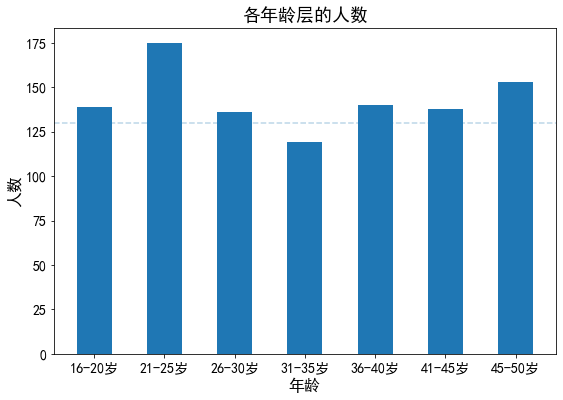

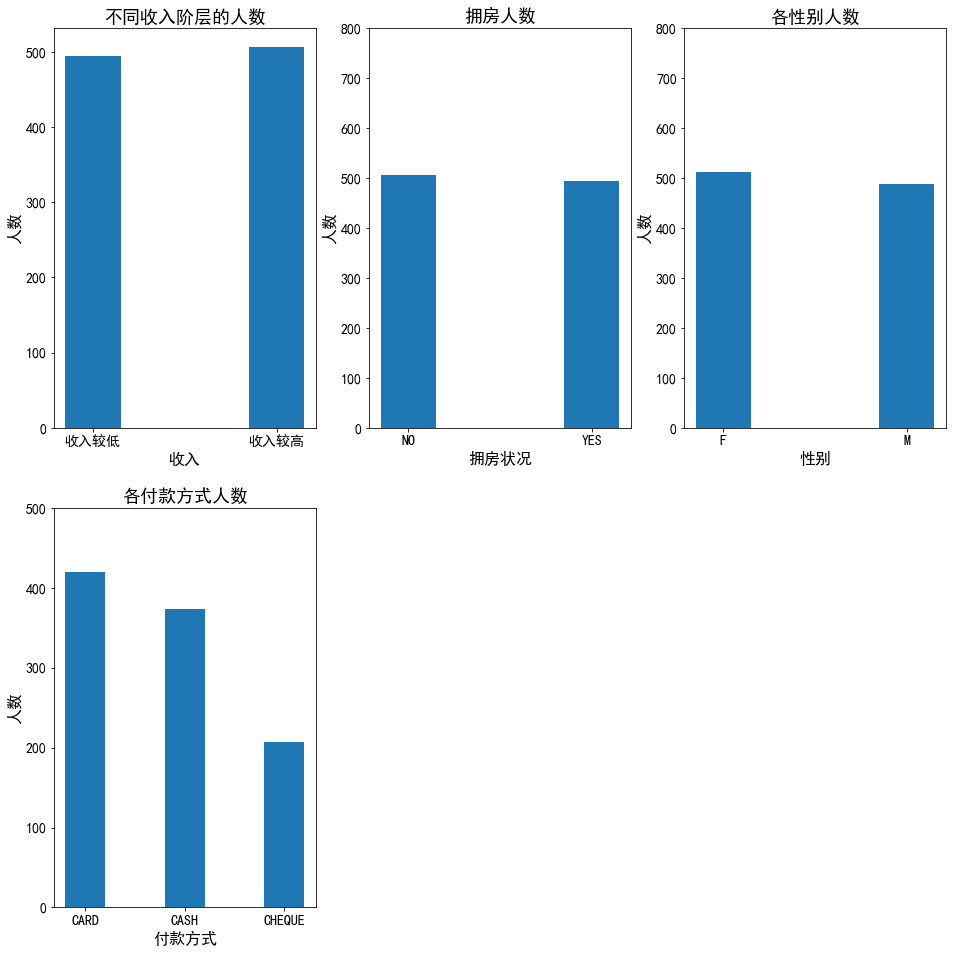

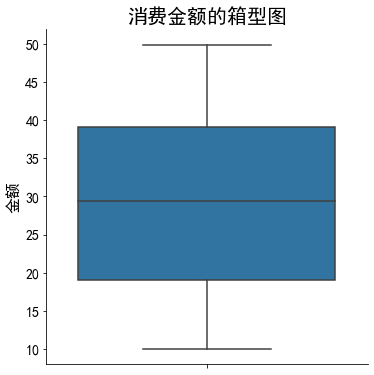

In [139]:
import seaborn as sns
#age
age0 = basketdf[(basketdf["age"]>15) & (basketdf["age"]<=20)]
age1 = basketdf[(basketdf["age"]>20) & (basketdf["age"]<=25)]
age2 = basketdf[(basketdf["age"]>25) & (basketdf["age"]<=30)] 
age3 = basketdf[(basketdf["age"]>30) & (basketdf["age"]<=35)] 
age4 = basketdf[(basketdf["age"]>35) & (basketdf["age"]<=40)] 
age5 = basketdf[(basketdf["age"]>40) & (basketdf["age"]<=45)] 
age6 = basketdf[(basketdf["age"]>45) & (basketdf["age"]<=50)]
y01 = [age0.count()[0],age1.count()[0],age2.count()[0],age3.count()[0],age4.count()[0],age5.count()[0],age6.count()[0]]
x01 = ["16-20岁","21-25岁","26-30岁","31-35岁","36-40岁","41-45岁","45-50岁"]
fig = plt.figure(figsize=(9, 6))
plt.bar(x01,height=y01,width=0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("年龄",fontsize=16)
plt.ylabel("人数",fontsize=16)
plt.title("各年龄层的人数",fontsize=18)
plt.axhline(130,ls="--",alpha=0.3)

#income
incomeLow = basketdf[basketdf["income"]<20000]
incomeHigh = basketdf[basketdf["income"]>=20000]
x02 = ["收入较低","收入较高"]
y02 = [incomeLow.count()[0],incomeHigh.count()[0]]
fig = plt.figure(figsize=(16, 25))
ax1 = fig.add_subplot(331)
ax1.bar(x02,height=y02,width=0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("收入",fontsize=16)
plt.ylabel("人数",fontsize=16)
plt.title("不同收入阶层的人数",fontsize=18)


#homeown
x03 = basketdf.groupby("homeown").count().index.tolist()
y03 = basketdf.groupby("homeown").count().iloc[:,0].tolist()
ax2 = fig.add_subplot(332)
ax2.bar(x03,height=y03,width=0.3)
plt.xticks(fontsize=14)
plt.yticks(np.linspace(0,800,9),fontsize=14)
plt.xlabel("拥房状况",fontsize=16)
plt.ylabel("人数",fontsize=16)
plt.title("拥房人数",fontsize=18)

#sex
x04 = basketdf.groupby("sex").count().index.tolist()
y04 = basketdf.groupby("sex").count().iloc[:,0].tolist()
ax3 = fig.add_subplot(333)
ax3.bar(x04,height=y04,width=0.3)
plt.xticks(fontsize=14)
plt.yticks(np.linspace(0,800,9),fontsize=14)
plt.xlabel("性别",fontsize=16)
plt.ylabel("人数",fontsize=16)
plt.title("各性别人数",fontsize=18)

#pmethod
x05 = basketdf.groupby("pmethod").count().index.tolist()
y05 = basketdf.groupby("pmethod").count().iloc[:,0].tolist()
ax4 = fig.add_subplot(334)
ax4.bar(x05,height=y05,width=0.4)
plt.xticks(fontsize=14)
plt.yticks(np.linspace(0,500,6),fontsize=14)
plt.xlabel("付款方式",fontsize=16)
plt.ylabel("人数",fontsize=16)
plt.title("各付款方式人数",fontsize=18)

#value
sns.catplot(y="value",kind="box",data=basketdf,legend=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("金额",fontsize=16)
plt.title("消费金额的箱型图",fontsize=20)

([<matplotlib.axis.YTick at 0x2496c3e3850>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

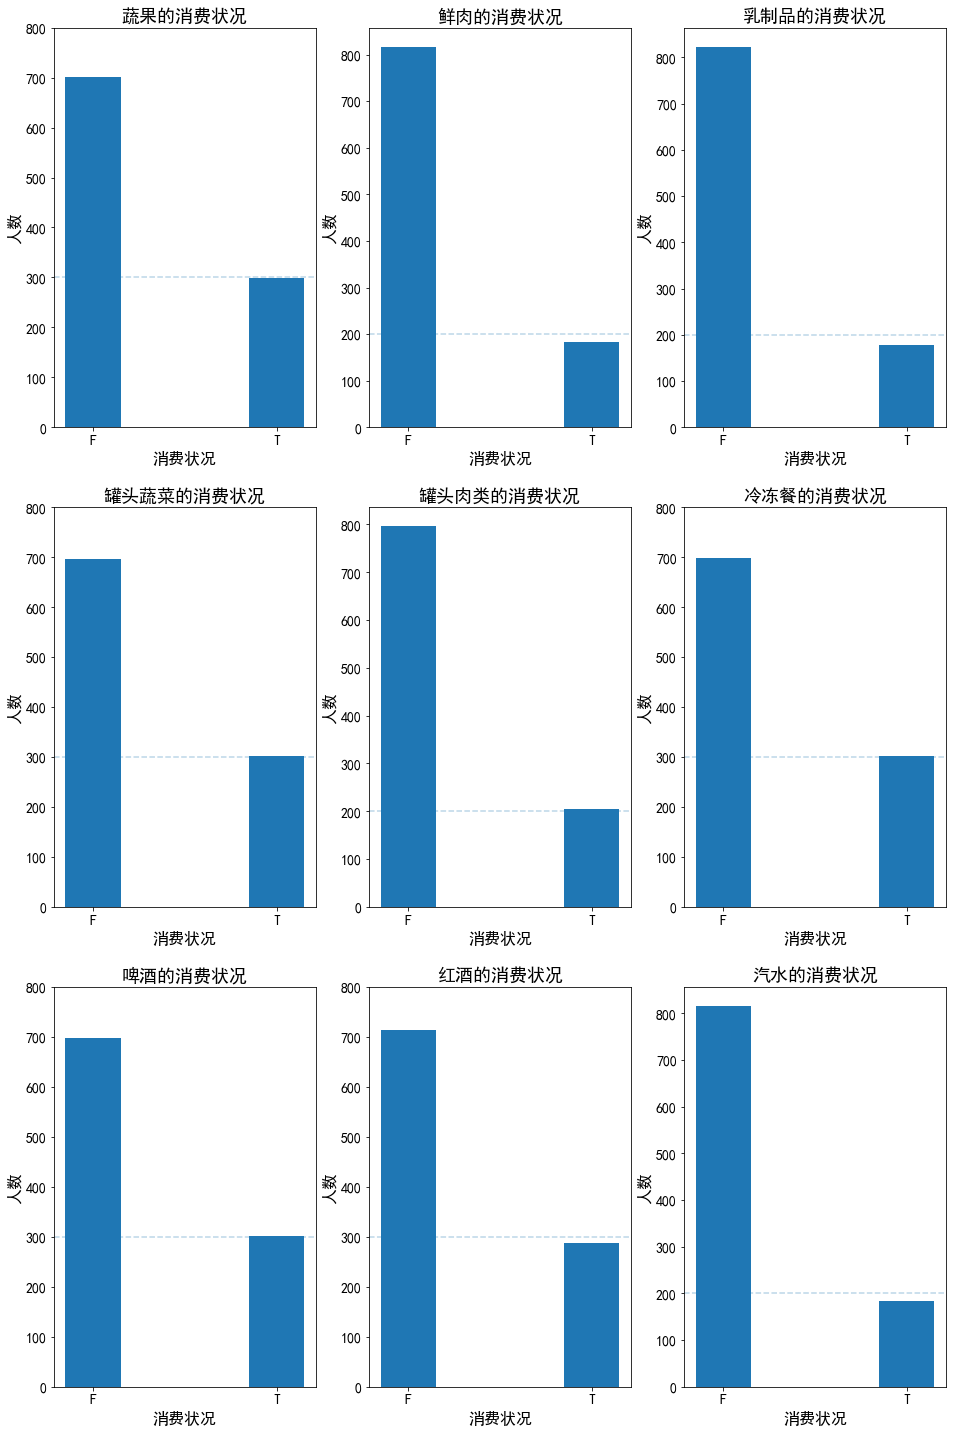

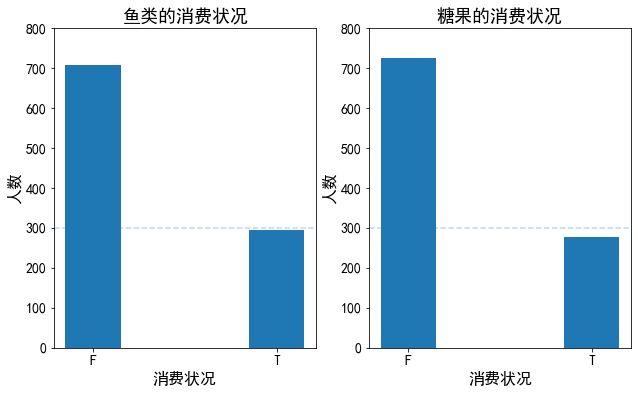

In [140]:
#fruiveg
a1 = basketdf.groupby("fruitveg").count().index.tolist()
b1 = basketdf.groupby("fruitveg").count().iloc[:,0].tolist()

fig = plt.figure(figsize=(16, 25))
ax1 = fig.add_subplot(331)
ax1.bar(a1,height=b1,width=0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("消费状况",fontsize=16)
plt.ylabel("人数",fontsize=16)
plt.title("蔬果的消费状况",fontsize=18)
plt.axhline(300,ls="--",alpha=0.3)
plt.yticks(np.linspace(0,800,9))


#freshmeat
a2 = basketdf.groupby("freshmeat").count().index.tolist()
b2 = basketdf.groupby("freshmeat").count().iloc[:,0].tolist()

ax2 = fig.add_subplot(332)
ax2.bar(a2,height=b2,width=0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("消费状况",fontsize=16)
plt.ylabel("人数",fontsize=16)
plt.title("鲜肉的消费状况",fontsize=18)
plt.axhline(200,ls="--",alpha=0.3)
plt.yticks(np.linspace(0,800,9))


#dairy
a3 = basketdf.groupby("dairy").count().index.tolist()
b3 = basketdf.groupby("dairy").count().iloc[:,0].tolist()

ax3 = fig.add_subplot(333)
ax3.bar(a3,height=b3,width=0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("消费状况",fontsize=16)
plt.ylabel("人数",fontsize=16)
plt.title("乳制品的消费状况",fontsize=18)
plt.axhline(200,ls="--",alpha=0.3)
plt.yticks(np.linspace(0,800,9))

#cannedveg
a4 = basketdf.groupby("cannedveg").count().index.tolist()
b4 = basketdf.groupby("cannedveg").count().iloc[:,0].tolist()

ax4 = fig.add_subplot(334)
ax4.bar(a4,height=b4,width=0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("消费状况",fontsize=16)
plt.ylabel("人数",fontsize=16)
plt.title("罐头蔬菜的消费状况",fontsize=18)
plt.axhline(300,ls="--",alpha=0.3)
plt.yticks(np.linspace(0,800,9))

#cannedmeat
a5 = basketdf.groupby("cannedmeat").count().index.tolist()
b5 = basketdf.groupby("cannedmeat").count().iloc[:,0].tolist()

ax5 = fig.add_subplot(335)
ax5.bar(a5,height=b5,width=0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("消费状况",fontsize=16)
plt.ylabel("人数",fontsize=16)
plt.title("罐头肉类的消费状况",fontsize=18)
plt.axhline(200,ls="--",alpha=0.3)
plt.yticks(np.linspace(0,800,9))

#frozenmeal
a6 = basketdf.groupby("frozenmeal").count().index.tolist()
b6 = basketdf.groupby("frozenmeal").count().iloc[:,0].tolist()

ax6 = fig.add_subplot(336)
ax6.bar(a6,height=b6,width=0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("消费状况",fontsize=16)
plt.ylabel("人数",fontsize=16)
plt.title("冷冻餐的消费状况",fontsize=18)
plt.axhline(300,ls="--",alpha=0.3)
plt.yticks(np.linspace(0,800,9))

#beer
a7 = basketdf.groupby("beer").count().index.tolist()
b7 = basketdf.groupby("beer").count().iloc[:,0].tolist()

ax7 = fig.add_subplot(337)
ax7.bar(a7,height=b6,width=0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("消费状况",fontsize=16)
plt.ylabel("人数",fontsize=16)
plt.title("啤酒的消费状况",fontsize=18)
plt.axhline(300,ls="--",alpha=0.3)
plt.yticks(np.linspace(0,800,9))


#wine
a8 = basketdf.groupby("wine").count().index.tolist()
b8 = basketdf.groupby("wine").count().iloc[:,0].tolist()

ax8 = fig.add_subplot(338)
ax8.bar(a8,height=b8,width=0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("消费状况",fontsize=16)
plt.ylabel("人数",fontsize=16)
plt.title("红酒的消费状况",fontsize=18)
plt.axhline(300,ls="--",alpha=0.3)
plt.yticks(np.linspace(0,800,9))


#softdrink
a9 = basketdf.groupby("softdrink").count().index.tolist()
b9 = basketdf.groupby("softdrink").count().iloc[:,0].tolist()

ax9 = fig.add_subplot(339)
ax9.bar(a9,height=b9,width=0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("消费状况",fontsize=16)
plt.ylabel("人数",fontsize=16)
plt.title("汽水的消费状况",fontsize=18)
plt.axhline(200,ls="--",alpha=0.3)
plt.yticks(np.linspace(0,800,9))
                      
                      
#fish
fig = plt.figure(figsize=(16, 20))
a10 = basketdf.groupby("beer").count().index.tolist()
b10 = basketdf.groupby("beer").count().iloc[:,0].tolist()

ax10 = fig.add_subplot(331)
ax10.bar(a10,height=b10,width=0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("消费状况",fontsize=16)
plt.ylabel("人数",fontsize=16)
plt.title("鱼类的消费状况",fontsize=18)
plt.axhline(300,ls="--",alpha=0.3)
plt.yticks(np.linspace(0,800,9))

#confectionery
a11 = basketdf.groupby("confectionery").count().index.tolist()
b11 = basketdf.groupby("confectionery").count().iloc[:,0].tolist()

ax11 = fig.add_subplot(332)
ax11.bar(a11,height=b11,width=0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("消费状况",fontsize=16)
plt.ylabel("人数",fontsize=16)
plt.title("糖果的消费状况",fontsize=18)
plt.axhline(300,ls="--",alpha=0.3)
plt.yticks(np.linspace(0,800,9))


Text(0.5, 1.0, '使用不同付款方式的男女数量')

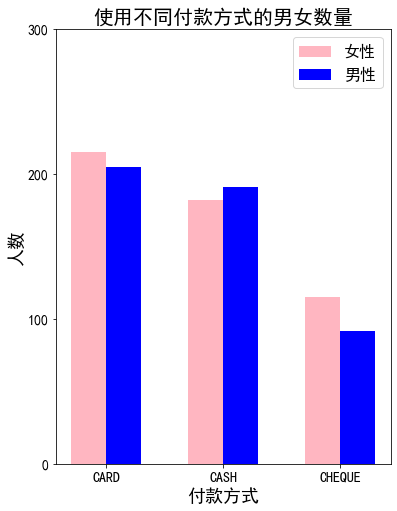

In [141]:

basketdf1 = basketdf.groupby(["pmethod","sex"]).count()
y1 = [basketdf1.iloc[0,0],basketdf1.iloc[2,0],basketdf1.iloc[4,0]]
y2 = [basketdf1.iloc[1,0],basketdf1.iloc[3,0],basketdf1.iloc[5,0]]
method = [basketdf1.index[0][0],basketdf1.index[2][0],basketdf1.index[4][0]]

fig=plt.figure(figsize=(6,8))
bar_width=0.3
plt.bar(x=range(len(method)), height=y1, label="女性",width=bar_width,color="lightpink",align="edge")
plt.bar(x=np.arange(len(method))+bar_width, height=y2, label="男性",width=bar_width,color="b",align="edge")
plt.xticks(np.arange(len(method))+bar_width, method,fontsize=14)
plt.yticks(np.linspace(0,300,4),fontsize=14)
plt.xlabel("付款方式",fontsize=18)
plt.ylabel("人数",fontsize=18)
plt.legend(fontsize=16)
plt.title("使用不同付款方式的男女数量",fontsize=20)

In [142]:
#使用支票付款的人最少，用银行卡付款的人最多，男性和女性都是对于付款方式的偏好顺序都是银行卡，现金，支票

Text(0.5, 1.0, '付款金额和支付方式的关系')

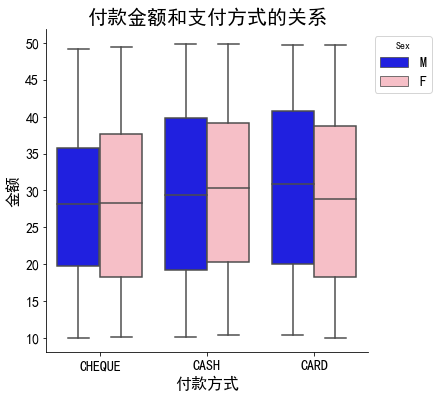

In [143]:
palette = {"F":"lightpink","M":'blue'}
s1 = sns.catplot(x="pmethod",y="value",kind="box",data=basketdf,hue="sex",palette=palette,legend=False)
plt.legend(bbox_to_anchor=(1,1),title="Sex",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("付款方式",fontsize=16)
plt.ylabel("金额",fontsize=16)
plt.title("付款金额和支付方式的关系",fontsize=20)

In [144]:
#消费金额似乎不影响消费者的付款方式，三种付款方式之间的中位数都没有明显差距，唯男性在支票付款上的四分位差较小

Text(0.5, 1.0, '使用不同付款方式的人的拥房状况')

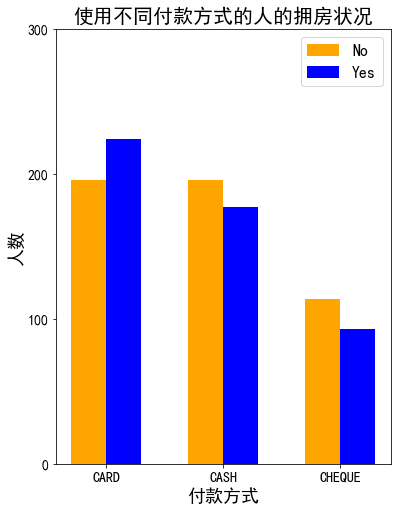

In [145]:
basketdf2 = basketdf.groupby(["pmethod","homeown"]).count()
y3 = [basketdf2.iloc[0,0],basketdf2.iloc[2,0],basketdf2.iloc[4,0]]
y4 = [basketdf2.iloc[1,0],basketdf2.iloc[3,0],basketdf2.iloc[5,0]]


fig=plt.figure(figsize=(6,8))
bar_width=0.3
plt.bar(x=range(len(method)), height=y3, label="No",width=bar_width,color="orange",align="edge")
plt.bar(x=np.arange(len(method))+bar_width, height=y4, label="Yes",width=bar_width,color="b",align="edge")
plt.xticks(np.arange(len(method))+bar_width, method,fontsize=14)
plt.yticks(np.linspace(0,300,4),fontsize=14)
plt.legend(fontsize=16)
plt.xlabel("付款方式",fontsize=18)
plt.ylabel("人数",fontsize=18)
plt.title("使用不同付款方式的人的拥房状况",fontsize=20)

In [146]:
#拥有房子的人显然更喜欢使用银行卡支付，这可能是因为他们经历过贷款购房等程序开始更了解与愿意使用金融产品，没有房子的人更喜欢用先进支付


count     1000.000000
mean     20171.800000
std       5767.558365
min      10200.000000
25%      15275.000000
50%      20150.000000
75%      25100.000000
max      30000.000000
Name: income, dtype: float64

494

506

Text(0.5, 1.0, '不同收入人群的付款方式')

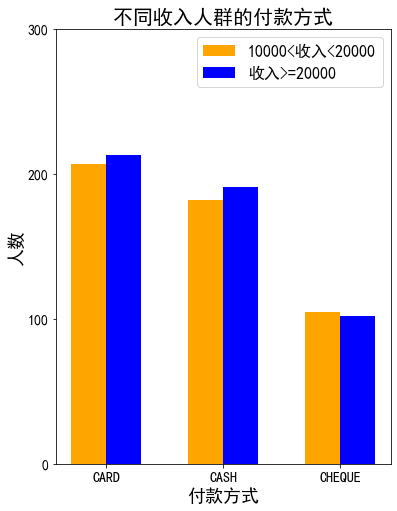

In [147]:
display(basketdf["income"].describe())
# incomeLow = basketdf[basketdf["income"]<20000]
# incomeHigh = basketdf[basketdf["income"]>=20000]
display(incomeLow.count()[0])
display(incomeHigh.count()[0])
#发现数据中人们收入最少有10200，中位数在20171，取20000为分界线将人们较为平均地分成较高收入人群和较低收入人群
incomeLow1 = incomeLow.groupby(["pmethod"]).count()
incomeHigh1 = incomeHigh.groupby(["pmethod"]).count()
y5 = incomeLow1.iloc[:,0].tolist()
y6 = incomeHigh1.iloc[:,0].tolist()

fig=plt.figure(figsize=(6,8))
bar_width=0.3
plt.bar(x=range(len(method)), height=y5, label="10000<收入<20000",width=bar_width,color="orange",align="edge")
plt.bar(x=np.arange(len(method))+bar_width, height=y6, label="收入>=20000",width=bar_width,color="b",align="edge")
plt.xticks(np.arange(len(method))+bar_width, method,fontsize=14)
plt.yticks(np.linspace(0,300,4),fontsize=14)
plt.legend(fontsize=16)
plt.xlabel("付款方式",fontsize=18)
plt.ylabel("人数",fontsize=18)
plt.title("不同收入人群的付款方式",fontsize=20)

In [148]:
#收入介于10000到20000之间的较低收入的人群使用支票付款的频率比高收入人群的频率高，但他们对于付款的偏好顺序仍然是银行卡，现金，支票。

count    1000.000000
mean       32.840000
std        10.342793
min        16.000000
25%        24.000000
50%        32.000000
75%        42.000000
max        50.000000
Name: age, dtype: float64

Text(0.5, 1.0, '不同年龄的人在付款方式上的占比')

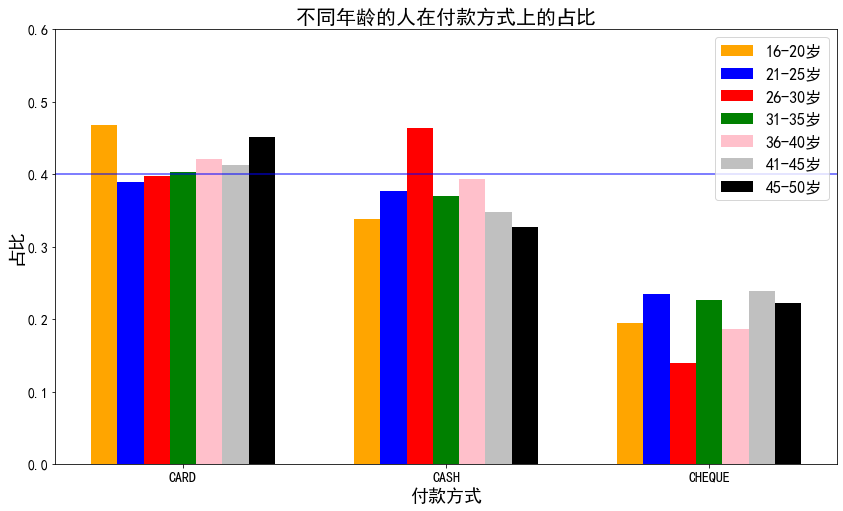

In [149]:
display(basketdf["age"].describe())
# age0 = basketdf[(basketdf["age"]>15) & (basketdf["age"]<=20)]
# age1 = basketdf[(basketdf["age"]>20) & (basketdf["age"]<=25)]
# age2 = basketdf[(basketdf["age"]>25) & (basketdf["age"]<=30)] 
# age3 = basketdf[(basketdf["age"]>30) & (basketdf["age"]<=35)] 
# age4 = basketdf[(basketdf["age"]>35) & (basketdf["age"]<=40)] 
# age5 = basketdf[(basketdf["age"]>40) & (basketdf["age"]<=45)] 
# age6 = basketdf[(basketdf["age"]>45) & (basketdf["age"]<=50)] 


#算每种方式在人群中的占比
y7 = [x/age0.count()[0] for x in age0.groupby(["pmethod"]).count().iloc[:,0]]
y8 = [x/age1.count()[0] for x in age1.groupby(["pmethod"]).count().iloc[:,0]]
y9 = [x/age2.count()[0] for x in age2.groupby(["pmethod"]).count().iloc[:,0]]
y10 = [x/age3.count()[0] for x in age3.groupby(["pmethod"]).count().iloc[:,0]]
y11 = [x/age4.count()[0] for x in age4.groupby(["pmethod"]).count().iloc[:,0]]
y12 = [x/age5.count()[0] for x in age5.groupby(["pmethod"]).count().iloc[:,0]]
y13 = [x/age6.count()[0] for x in age6.groupby(["pmethod"]).count().iloc[:,0]]

fig=plt.figure(figsize=(14,8))
bar_width=0.1
plt.bar(x=range(len(method)), height=y7, label="16-20岁",width=bar_width,color="orange",align="edge")
plt.bar(x=np.arange(len(method))+bar_width, height=y8, label="21-25岁",width=bar_width,color="b",align="edge")
plt.bar(x=np.arange(len(method))+bar_width*2, height=y9, label="26-30岁",width=bar_width,color="red",align="edge")
plt.bar(x=np.arange(len(method))+bar_width*3, height=y10, label="31-35岁",width=bar_width,color="green",align="edge")
plt.bar(x=np.arange(len(method))+bar_width*4, height=y11, label="36-40岁",width=bar_width,color="pink",align="edge")
plt.bar(x=np.arange(len(method))+bar_width*5, height=y12, label="41-45岁",width=bar_width,color="silver",align="edge")
plt.bar(x=np.arange(len(method))+bar_width*6, height=y13, label="45-50岁",width=bar_width,color="black",align="edge")

plt.axhline(0.4,color="blue",lw=2,alpha=0.5)
plt.xticks(np.arange(len(method))+bar_width*7/2, method,fontsize=14)
plt.legend(fontsize=16)
plt.xlabel("付款方式",fontsize=18)
plt.ylabel("占比",fontsize=18)
plt.yticks(np.linspace(0,0.6,7),fontsize=14)
plt.title("不同年龄的人在付款方式上的占比",fontsize=20)

In [150]:
#可以发现除了26-30岁的群体，其他年龄层的人都较喜欢使用银行卡作为支付方式，而26-30岁的群体则较喜欢使用现金支付

1.2.2 关联规则挖掘（2分）  
(1) 利用fruitveg, freshmeat, dairy, cannedveg, cannedmeat, frozenmeal, beer, wine, softdrink, fish, confectionery字段进行关联规则挖掘
，可自行指定最小支持度和最小置信度阈值，并给出理由（1分）；     
(2) 选出至少4条找到的关联规则进行比较和解释（1分）。

In [151]:
ruleMdf = basketdf.iloc[:,7:]
list2=[]
for i in range(ruleMdf.shape[0]):
    lst = []
    for j in range(ruleMdf.shape[1]):
        if ruleMdf.iloc[i,j] == "T":
            lst.append(ruleMdf.columns[j])
    if len(lst) != 0:
        list2.append(tuple(lst))
list2  


[('freshmeat', 'dairy', 'confectionery'),
 ('freshmeat', 'confectionery'),
 ('cannedveg', 'frozenmeal', 'beer', 'fish'),
 ('dairy', 'wine'),
 ('freshmeat', 'wine', 'fish'),
 ('fruitveg', 'softdrink'),
 ('beer',),
 ('fruitveg', 'frozenmeal'),
 ('fruitveg', 'fish'),
 ('fruitveg', 'freshmeat', 'dairy', 'cannedveg', 'wine', 'fish'),
 ('fruitveg', 'fish'),
 ('dairy', 'cannedmeat', 'frozenmeal', 'fish'),
 ('softdrink', 'fish'),
 ('fruitveg', 'dairy', 'softdrink', 'fish'),
 ('frozenmeal', 'beer', 'softdrink'),
 ('fruitveg', 'cannedveg', 'fish'),
 ('fish',),
 ('beer', 'fish'),
 ('fruitveg', 'cannedveg', 'wine', 'fish', 'confectionery'),
 ('frozenmeal', 'fish'),
 ('wine', 'confectionery'),
 ('fish',),
 ('fruitveg',
  'freshmeat',
  'dairy',
  'cannedveg',
  'cannedmeat',
  'frozenmeal',
  'beer',
  'wine'),
 ('beer', 'confectionery'),
 ('fruitveg', 'dairy', 'frozenmeal', 'beer'),
 ('freshmeat', 'wine', 'confectionery'),
 ('freshmeat', 'wine', 'fish', 'confectionery'),
 ('cannedmeat',),
 ('froze

In [152]:
from efficient_apriori import apriori
itemsets, rules = apriori(list2, min_support=0.05,  min_confidence=0.1)
#如果把支持度和置信放得过低就会出现过多关联规则，而题目只要求针对四个进行解读，因此可以适当地提高置信度和支持度来获得相对较为强的关联关系。

In [153]:
itemsets

{1: {('confectionery',): 276,
  ('dairy',): 177,
  ('freshmeat',): 183,
  ('frozenmeal',): 302,
  ('cannedveg',): 303,
  ('beer',): 293,
  ('fish',): 292,
  ('wine',): 287,
  ('fruitveg',): 299,
  ('softdrink',): 184,
  ('cannedmeat',): 204},
 2: {('confectionery', 'dairy'): 56,
  ('confectionery', 'freshmeat'): 54,
  ('beer', 'cannedveg'): 167,
  ('beer', 'fish'): 85,
  ('beer', 'frozenmeal'): 170,
  ('cannedveg', 'fish'): 89,
  ('cannedveg', 'frozenmeal'): 173,
  ('fish', 'frozenmeal'): 90,
  ('fish', 'freshmeat'): 48,
  ('fish', 'wine'): 78,
  ('freshmeat', 'wine'): 49,
  ('fruitveg', 'softdrink'): 56,
  ('frozenmeal', 'fruitveg'): 86,
  ('fish', 'fruitveg'): 145,
  ('cannedveg', 'freshmeat'): 55,
  ('cannedveg', 'fruitveg'): 86,
  ('cannedveg', 'wine'): 97,
  ('dairy', 'fish'): 56,
  ('dairy', 'fruitveg'): 62,
  ('freshmeat', 'fruitveg'): 59,
  ('fruitveg', 'wine'): 84,
  ('cannedmeat', 'fish'): 63,
  ('cannedmeat', 'frozenmeal'): 75,
  ('dairy', 'frozenmeal'): 51,
  ('fish', 'soft

In [154]:
rules

[{dairy} -> {confectionery},
 {confectionery} -> {dairy},
 {freshmeat} -> {confectionery},
 {confectionery} -> {freshmeat},
 {cannedveg} -> {beer},
 {beer} -> {cannedveg},
 {fish} -> {beer},
 {beer} -> {fish},
 {frozenmeal} -> {beer},
 {beer} -> {frozenmeal},
 {fish} -> {cannedveg},
 {cannedveg} -> {fish},
 {frozenmeal} -> {cannedveg},
 {cannedveg} -> {frozenmeal},
 {frozenmeal} -> {fish},
 {fish} -> {frozenmeal},
 {freshmeat} -> {fish},
 {fish} -> {freshmeat},
 {wine} -> {fish},
 {fish} -> {wine},
 {wine} -> {freshmeat},
 {freshmeat} -> {wine},
 {softdrink} -> {fruitveg},
 {fruitveg} -> {softdrink},
 {fruitveg} -> {frozenmeal},
 {frozenmeal} -> {fruitveg},
 {fruitveg} -> {fish},
 {fish} -> {fruitveg},
 {freshmeat} -> {cannedveg},
 {cannedveg} -> {freshmeat},
 {fruitveg} -> {cannedveg},
 {cannedveg} -> {fruitveg},
 {wine} -> {cannedveg},
 {cannedveg} -> {wine},
 {fish} -> {dairy},
 {dairy} -> {fish},
 {fruitveg} -> {dairy},
 {dairy} -> {fruitveg},
 {fruitveg} -> {freshmeat},
 {freshmea

In [155]:
#购买罐头蔬菜的人会购买冷冻餐，罐头肉类，冷冻肉这些在处理上较为简易的方便食材，也会购买酒类，糖果，这类人群可能较在意时间及不注重身体健康
#购买鱼的人通常都会连同各类食材一起购买，其中有新鲜的也有冷冻的。
#购买乳制品的人会一起购买糖果，鱼，蔬菜水果，冷冻肉，但却不会购买酒类或罐头食品，这类人群与购买罐头视频的人群相反，他们对自身健康较为重视
'''购买啤酒的人也会红酒和汽水，但是购买汽水的人却不会购买红酒，购买红酒的人也不会购买汽水，这可能和他们之间的定价有关，啤酒位于中间价位,
消费者不论是向上购买或向下购买都不会距离自己的日常消费金额和习惯相差太大，购买汽水的人可能比较不会付出大金额去购买红酒。'''

'购买啤酒的人也会红酒和汽水，但是购买汽水的人却不会购买红酒，购买红酒的人也不会购买汽水，这可能和他们之间的定价有关，啤酒位于中间价位,\n消费者不论是向上购买或向下购买都不会距离自己的日常消费金额和习惯相差太大，购买汽水的人可能比较不会付出大金额去购买红酒。'

### 第二部分：社会网络分析（本部分满分5分）

数据：MAG数据可视化领域的数据（和之前的练习、作业相同的数据）。

2.1 请构建作者和作者之间的合著网络（节点：作者；无向边：两个作者之间存在合著关系，即他们至少一次同时出现在一篇论文的作者列表中；边的权重：两个作者间的合著次数）。计算以下指标或回答以下问题（共2.75分）：

（1）网络中节点的数量（0.25分）；

（2）网络中边的数量（0.25分）；

（3）网络的平均聚类系数（Average clustering coefficient）（0.25分）；

（4）网络的密度（0.25分）；

（5）对边权的分布做可视化，并对可视化结果做简要描述（0.5分，其中可视化0.25分，描述0.25分）；

（6）对节点的度分布进行描述（0.5分，其中对度分布进行适当的可视化0.25分，对结果做描述0.25分）；

（7）选择网络中节点度数最高的5个节点，然后计算它们的三种中心性（0.75分）。

In [156]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib as plt

In [157]:
authordf = pd.read_csv("dataset/author2paper_table.txt")
authordf_splited = authordf.iloc[:,0].str.split(";",expand=True)
authordf1 = pd.DataFrame(authordf_splited)
authordf1.set_axis(["paper_id","author_id","author_sequence_number"],axis=1,inplace=True)


In [158]:
authordf1["count"] = authordf1.groupby(["paper_id"])["author_id"].transform("count")
authordf1

,paper_id,author_id,author_sequence_number,count
0,271214,2000415444,1,2
1,271214,2572028590,2,2
2,1216968,2103945787,1,3
3,1216968,2155380330,3,3
4,1216968,2506879740,2,3
...,...,...,...,...
58134,2908398712,2908096397,11,18
58135,2908398712,2908118657,9,18
58136,2908398712,2908365158,7,18
58137,2908398712,2908395519,6,18


In [159]:
#把没有多人引用的文献剔除
authordf2 = authordf1.drop(authordf1[authordf1["count"]==1].index)
#排列author_sequence_number
authordf2.sort_values(by=['paper_id','author_sequence_number'],ascending=[True,False],inplace=True)
authordf2

,paper_id,author_id,author_sequence_number,count
1248,1001605478,2425653831,2,2
1247,1001605478,2029890749,1,2
1250,1006291285,2074023935,2,2
1249,1006291285,140757381,1,2
1255,1009579471,2760865876,5,5
...,...,...,...,...
1241,995681285,2281979691,3,6
1240,995681285,2126990796,2,6
1238,995681285,2026169623,1,6
1244,996902485,765408933,2,2


In [160]:
#生成合作关系的列表
list1 = []
loc = 0
while loc != len(authordf2)-1:
    for i in range(1,int(authordf2.iloc[loc,2])):
        a = authordf2.iloc[loc,1]
        b = authordf2.iloc[loc+i,1]
        if a>b:
            list1.append((b,a))
        else:
            list1.append((a,b))       
    loc+=1


In [161]:
#根据列表计算权重
from collections import Counter
#用字典储存出现次数
authorDic = Counter(list1)
#改成社会网络的输入格式
authorlist = list(authorDic.keys())
countlist = list(authorDic.values())
relateList = []
for i in range(len(authorDic)):
    relateList.append((authorlist[i][0],authorlist[i][1],countlist[1]))
# relateList

#生成节点
nodesName = authordf2.iloc[:,1].unique().tolist()
# nodesName


In [162]:
len(list1)
len

<function len(obj, /)>

In [163]:
G = nx.Graph()
G.add_weighted_edges_from(relateList)
G.add_nodes_from(nodesName)


In [164]:
print("网络中节点的数量： " + str(len(G.nodes)))
print("网络中边的数量： " + str(len(G.edges)))
print("网络的平均聚类系数： " + str(nx.cluster.average_clustering(G)))
print("网络的密度： " + str(nx.density(G)))

网络中节点的数量： 39906
网络中边的数量： 98250
网络的平均聚类系数： 0.8069296826862029
网络的密度： 0.00012339485197807883


Text(0.5, 1.0, '节点度分布')

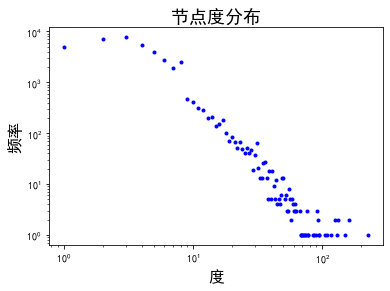

In [165]:
import matplotlib.pyplot as plt
degree=nx.degree_histogram(G)
x=range(len(degree))
y=[z for z in degree]
figsize=(5.8,5.2)
plt.loglog(x,y,'.',c='blue')
plt.ylabel("频率",fontsize=16)
plt.xlabel("度",fontsize=16)
plt.title("节点度分布",fontsize=18)




In [166]:
#可以看到该图是右偏的，存在很多度值较低的节点，多数人的合作次数非常少

In [167]:
#选择网络中节点度数最高的5个节点，然后计算它们的三种中心性（0.75分）
G1 = []
for x in range(5):
    G1.append(sorted(G.degree, key=lambda x: x[1], reverse=True)[:5][x][0])

In [168]:
#度中心性
degreeCen = nx.degree_centrality(G)
for x in range(5):
    print("节点("+ str(G1[x]) + ")的点度中心性： " + str(degreeCen[G1[x]]))


节点(2122423217)的点度中心性： 0.005688510211752913
节点(2147343253)的点度中心性： 0.004034582132564841
节点(2150576810)的点度中心性： 0.004034582132564841
节点(2122502592)的点度中心性： 0.003758927452700163
节点(2083449707)的点度中心性： 0.0033078561583761434


In [169]:
betCen = nx.betweenness_centrality(G,k=500)
for x in range(5):
    print("节点("+ str(G1[x]) + ")的点度中心性： " + str(betCen[G1[x]]))

节点(2122423217)的点度中心性： 0.011725334232357202
节点(2147343253)的点度中心性： 0.009246273260846313
节点(2150576810)的点度中心性： 0.007663634481526513
节点(2122502592)的点度中心性： 0.005274918901080489
节点(2083449707)的点度中心性： 0.0022571896973268115


In [170]:
for x in range(5):
    print("节点("+ str(G1[x]) + ")的点度中心性： " + str(nx.closeness_centrality(G,u=G1[x])))

节点(2122423217)的点度中心性： 0.08016703263729148
节点(2147343253)的点度中心性： 0.07858267352958363
节点(2150576810)的点度中心性： 0.07648836837631313
节点(2122502592)的点度中心性： 0.07598176650417081
节点(2083449707)的点度中心性： 0.07346439686340873


2.2 请构建论文和论文之间的引用网络（节点：论文，有向边：论文A引用了论文B，意即论文B出现在了A的参考文献列表中，边的权重：无）。计算以下指标或回答以下问题（共1.75分）：

（1）找出两个你认为比较“重要”的节点（建议使用上课提到的三种中心性），然后计算它们之间的最短路径（0.5分）；

（2）从现在的引用网络中构建一个子网络，这个子网络的所有节点在原引用网络都至少被引5次，这个子网络的边即上述筛选过的节点之间的引用关系。请使用边列表（edgelist）的形式将这个子网络写（write）入一个文件中。（1.25分，其中正确的建立子网络1分，写入文件0.25分）；


In [171]:
citationdf = pd.read_csv("dataset/citation_table.txt")
citationdf_splited = citationdf.iloc[:,0].str.split(";",expand=True)
citationdf1 = pd.DataFrame(citationdf_splited)
citationdf1.set_axis(["citing_id","cited_id"],axis=1,inplace=True)

In [172]:
alist = []
loc = 0
key = authordf2.iloc[0,0]
for x in range(citationdf1.shape[0]):
    alist.append((citationdf1.iloc[x][0],citationdf1.iloc[x][1]))
alist
nodesName2 = citationdf1.iloc[:,0].unique().tolist()


In [173]:
G2 = nx.DiGraph()
G2.add_edges_from(alist)
G2.add_nodes_from(nodesName2)


In [174]:
degreeCen2 = nx.degree_centrality(G2)
#根据点度中心性选两个节点

status = True
i = 1
while status:
    q = list(degreeCen2.keys())[list(degreeCen2.values()).index(max(degreeCen2.values()))]
    w = list(degreeCen2.keys())[list(degreeCen2.values()).index(sorted(degreeCen2.values())[i])]
    i+=1
    if G2.has_edge(q,w):
        print("从节点%s到节点%s的最短路径是"%(q,w))
        print(nx.shortest_path(G2, str(q), str(w)))
        status =False






KeyboardInterrupt: 

2.3 简要回答（不超过200字）：什么是六度分割理论？它有什么应用？（0.5分）

In [175]:
 print("六度分割理论是有心理学教授Stanley Milgram发现的，指世界上所有互不相识的人只需要最多6为中间人就能建立起联系，又称小世界现象。\
 我们只需要通过6个人就可以认识任何陌生人，他被用于病毒式营销，利用用户地口碑，可以将信息像病毒一样以低成本、高效率地传播。")
    

六度分割理论是有心理学教授Stanley Milgram发现的，指世界上所有互不相识的人只需要最多6为中间人就能建立起联系，又称小世界现象。我们只需要通过6个人就可以认识任何陌生人，他被用于病毒式营销，利用用户地口碑，可以将信息像病毒一样以低成本、高效率地传播。
